# 연구과제(3) 풀이

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/apple_quality.xlsx", index_col='A_id', categories=['Quality'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Size         4000 non-null   float64 
 1   Weight       4000 non-null   float64 
 2   Sweetness    4000 non-null   float64 
 3   Crunchiness  4000 non-null   float64 
 4   Juiciness    4000 non-null   float64 
 5   Ripeness     4000 non-null   float64 
 6   Acidity      4000 non-null   float64 
 7   Quality      4000 non-null   category
dtypes: category(1), float64(7)
memory usage: 254.0 KB
None

데이터프레임 상위 5개 행
+--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------+
|   A_id |      Size |   Weight |   Sweetness |   Crunchiness |   Juiciness |   Ripeness |   Acidity | Quality   |
|--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------|
|      0 |  -3.97005 | -2.51234 |     5.346

> 종속변수에 따른 데이터 불균형은 보이지 않는다.

## #02. 데이터 살펴보기 + 데이터 전처리

### [1] 상자그림을 통한 데이터 분포 확인

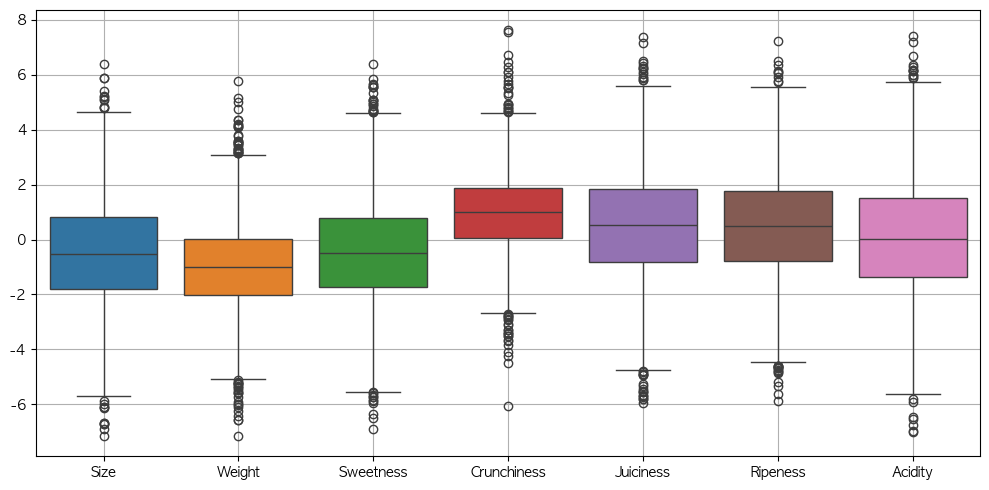

In [3]:
my_boxplot(origin)

> 이상치가 다수 확인된다. (이상치 제거 전후에 대한 비교 필요)
>
> 데이터 분포가 판단이 애매함 (스케일링 전후에 대한 비교 필요)

### [2] 종속변수에 따른 데이터 분포 확인

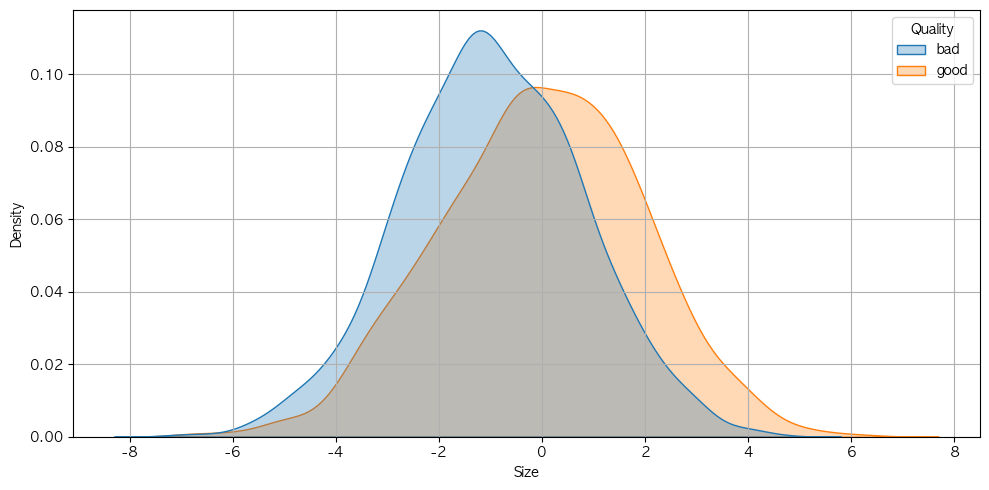

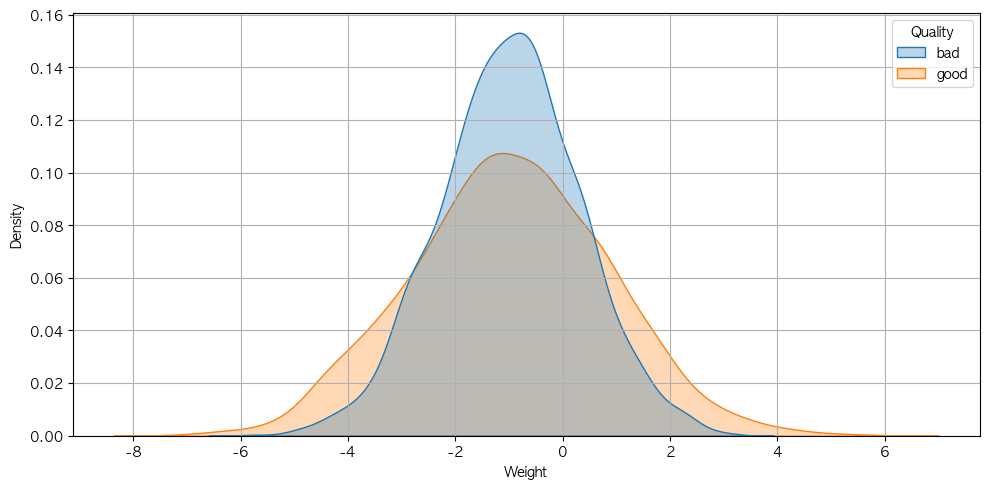

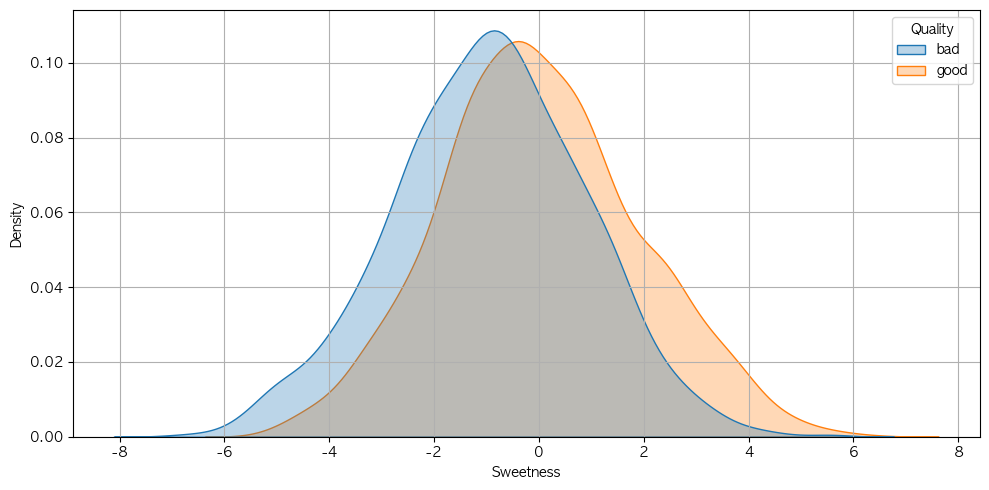

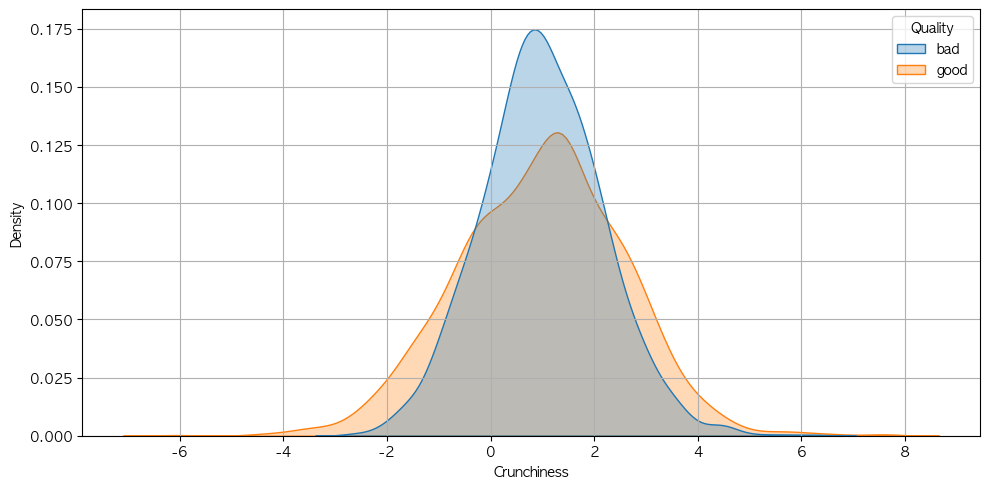

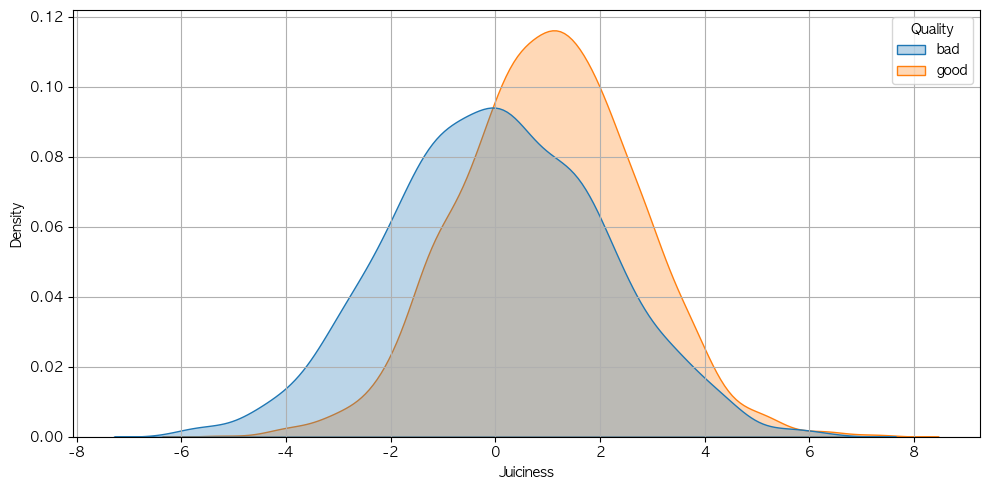

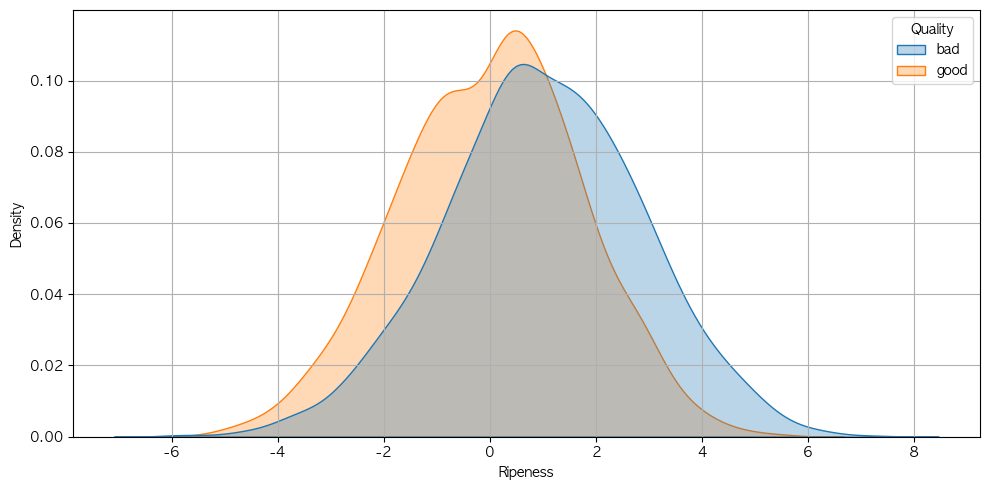

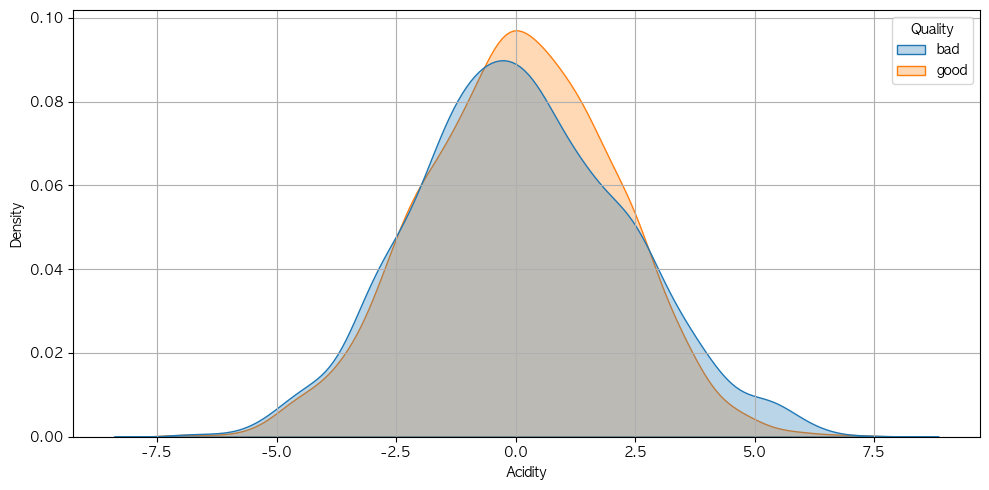

In [4]:
my_distribution_by_class(origin, hue='Quality', fill=True)

> 대부분의 변수가 품질에 따라 평균에 유의미한 차이를 보인다.
>
> 무게(Weight),  바삭함(Crunchiness)은 품질에 따른 차이가 크지 않은 것으로 생각된다. (제외 전후에 대한 결과 비교 필요)

### [4] 종속변수 라벨링

In [5]:
df1 = my_labelling(origin, 'Quality')
df1

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0


## #03. 분석하기

### [1] Case 1 - 기본 변수 그대로 진행

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

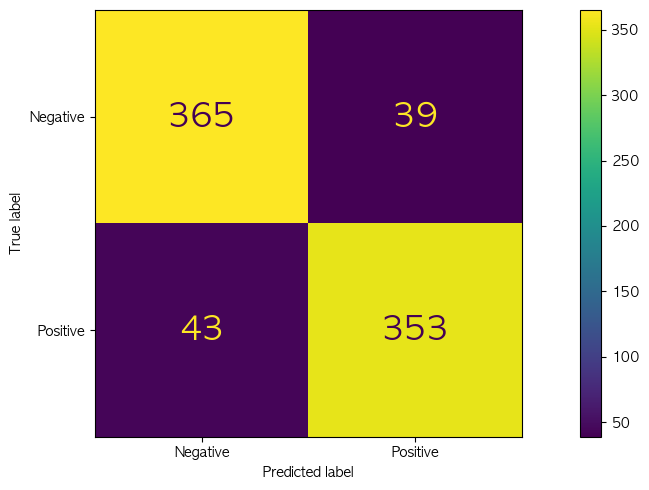

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


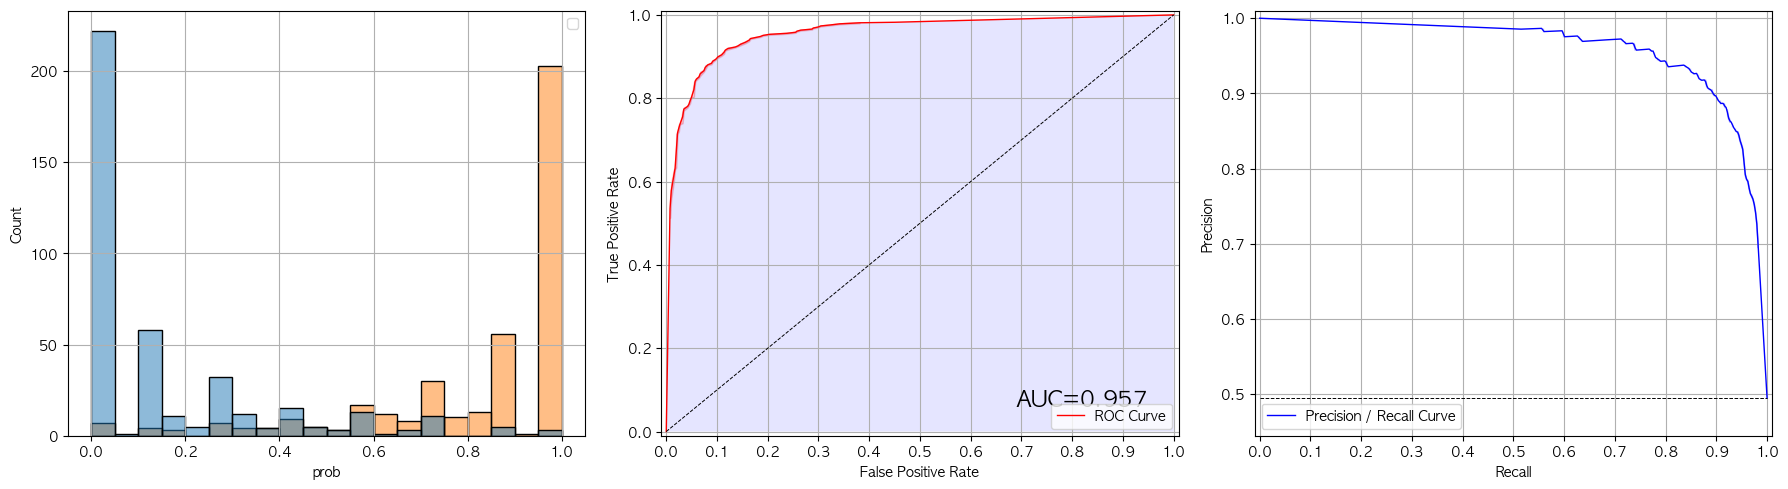


[학습곡선]


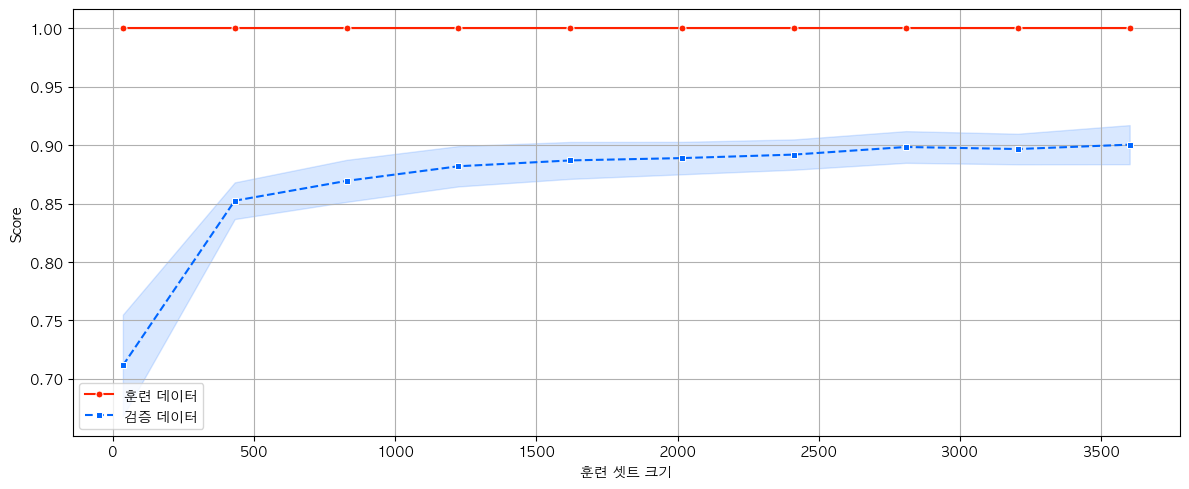

+----+------------+-------------+---------+
|    | 종속변수   | 독립변수    |     VIF |
|----+------------+-------------+---------|
|  0 | Quality    | Size        | 1.26265 |
|  1 | Quality    | Weight      | 1.66448 |
|  2 | Quality    | Sweetness   | 1.37202 |
|  3 | Quality    | Crunchiness | 1.42554 |
|  4 | Quality    | Juiciness   | 1.21852 |
|  5 | Quality    | Ripeness    | 1.57368 |
|  6 | Quality    | Acidity     | 1.14861 |
+----+------------+-------------+---------+


In [6]:
x_train, x_test, y_train, y_test = my_train_test_split(df1, yname='Quality')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

estimators = my_classification(x_train, y_train, x_test, y_test)
my_classification_result(estimators['best'], x_train, y_train, x_test, y_test)
my_classification_report(estimators['best'], x_train, y_train, x_test, y_test)

> 가장 분석 성능이 좋은 KNN에서 89.7%의 정확도와 90%의 정밀도를 보이지만 학습곡선에서 과대적합이 발견되었다.
>
> 독립변수에 대한 다중 공선성은 보이지 않는다.

### [2] Case 2 - 데이터 스케일링 후 분석

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

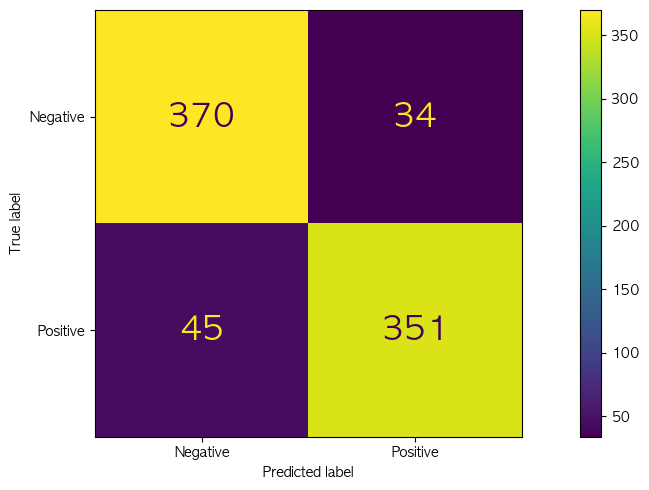

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


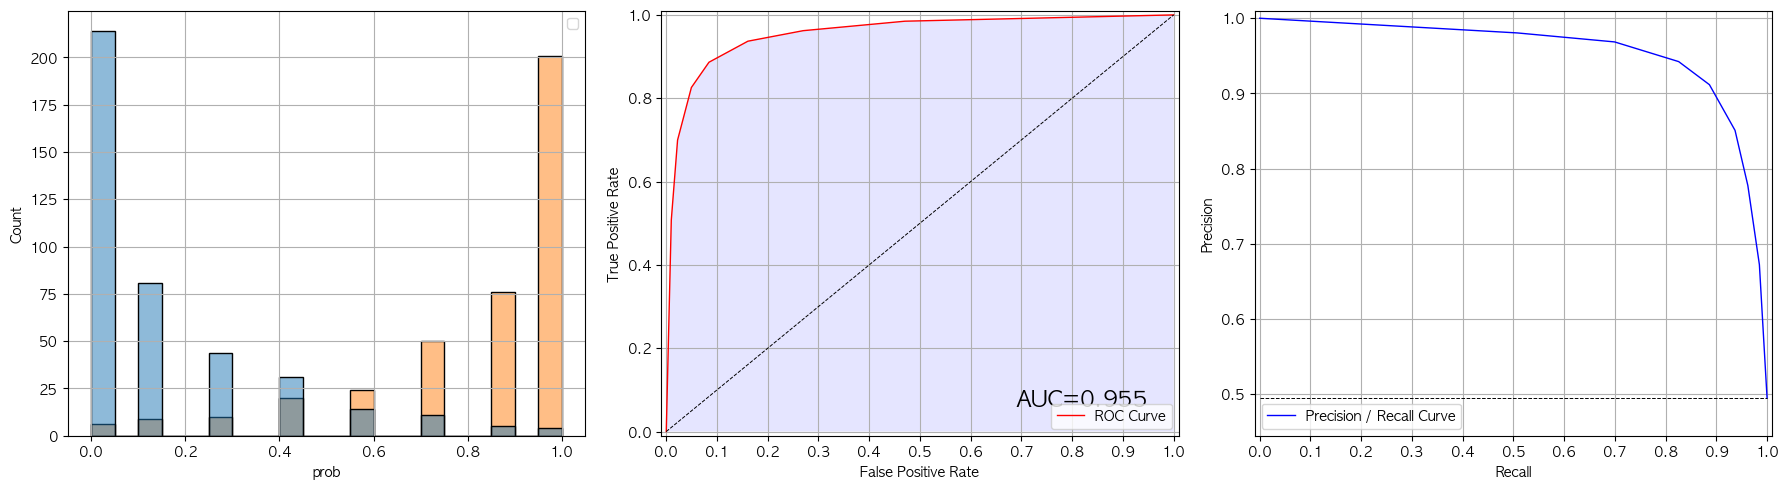


[학습곡선]


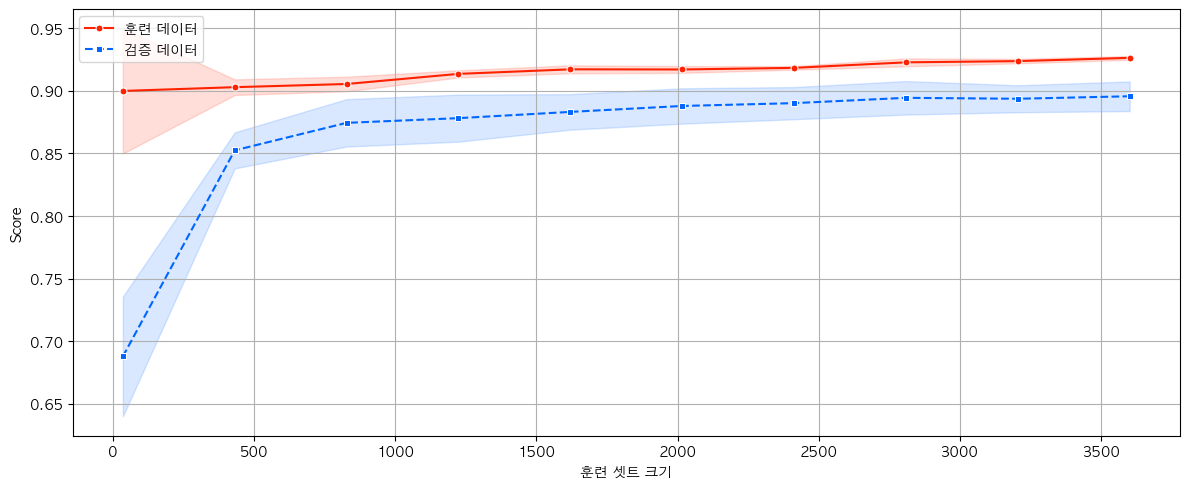

+----+------------+-------------+---------+
|    | 종속변수   | 독립변수    |     VIF |
|----+------------+-------------+---------|
|  0 | Quality    | Size        | 1.42078 |
|  1 | Quality    | Weight      | 1.41257 |
|  2 | Quality    | Sweetness   | 1.44135 |
|  3 | Quality    | Crunchiness | 1.24928 |
|  4 | Quality    | Juiciness   | 1.23833 |
|  5 | Quality    | Ripeness    | 1.47067 |
|  6 | Quality    | Acidity     | 1.15368 |
+----+------------+-------------+---------+


In [7]:
df2 = my_standard_scaler(df1, yname='Quality')
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Quality')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

estimators = my_classification(x_train, y_train, x_test, y_test)
my_classification_result(estimators['best'], x_train, y_train, x_test, y_test)
my_classification_report(estimators['best'], x_train, y_train, x_test, y_test)

> 정확도와 정밀도가 소폭 상승했으며 과대적합도 해소되었다.

### [3] Case 3 - 2차항 생성

#### (1) 2차항에 대한 변수 생성하기

In [9]:
df3 = my_poly_features(df2, ignore='Quality')
df3

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Size^2,Size Weight,Size Sweetness,...,Crunchiness Juiciness,Crunchiness Ripeness,Crunchiness Acidity,Juiciness^2,Juiciness Ripeness,Juiciness Acidity,Ripeness^2,Ripeness Acidity,Acidity^2,Quality
A_id,,,,,,,,,,,,,,,,,,,,,
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,3.234330,1.709174,-5.383440,...,-0.983439,0.127991,0.383688,0.476852,-0.062061,-0.186043,0.008077,0.024213,0.072585,1
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,0.128924,0.414501,-0.763972,...,0.075965,0.084668,-0.162873,0.031247,0.034827,-0.066994,0.038817,-0.074670,0.143639,1
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0.011978,-0.024708,-0.071414,...,-1.141405,0.270959,-1.141993,1.453042,-0.344938,1.453791,0.081885,-0.345116,1.454541,0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,0.006396,0.063993,-0.073892,...,-1.250958,1.612243,-0.261314,2.623025,-3.380572,0.547926,4.356903,-0.706171,0.114457,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,0.938133,-0.185617,0.042777,...,-1.431474,1.054717,-0.220993,1.703091,-1.254845,0.262926,0.924575,-0.193725,0.040591,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0.085106,-0.014176,-0.487027,...,-0.224477,-0.340312,-0.010546,0.377519,0.572326,0.017736,0.867659,0.026888,0.000833,0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,0.011854,0.199693,0.014930,...,0.292818,0.980940,-0.976329,0.063824,0.213811,-0.212806,0.716267,-0.712900,0.709549,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,1.222472,0.792648,1.120895,...,-0.204636,-0.532657,0.156559,0.764539,1.990050,-0.584916,5.179981,-1.522502,0.447494,0


#### (2) 분석 모형 구현

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

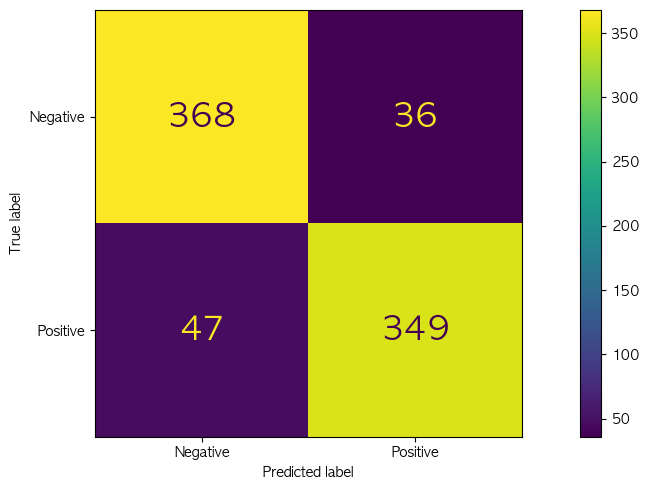

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


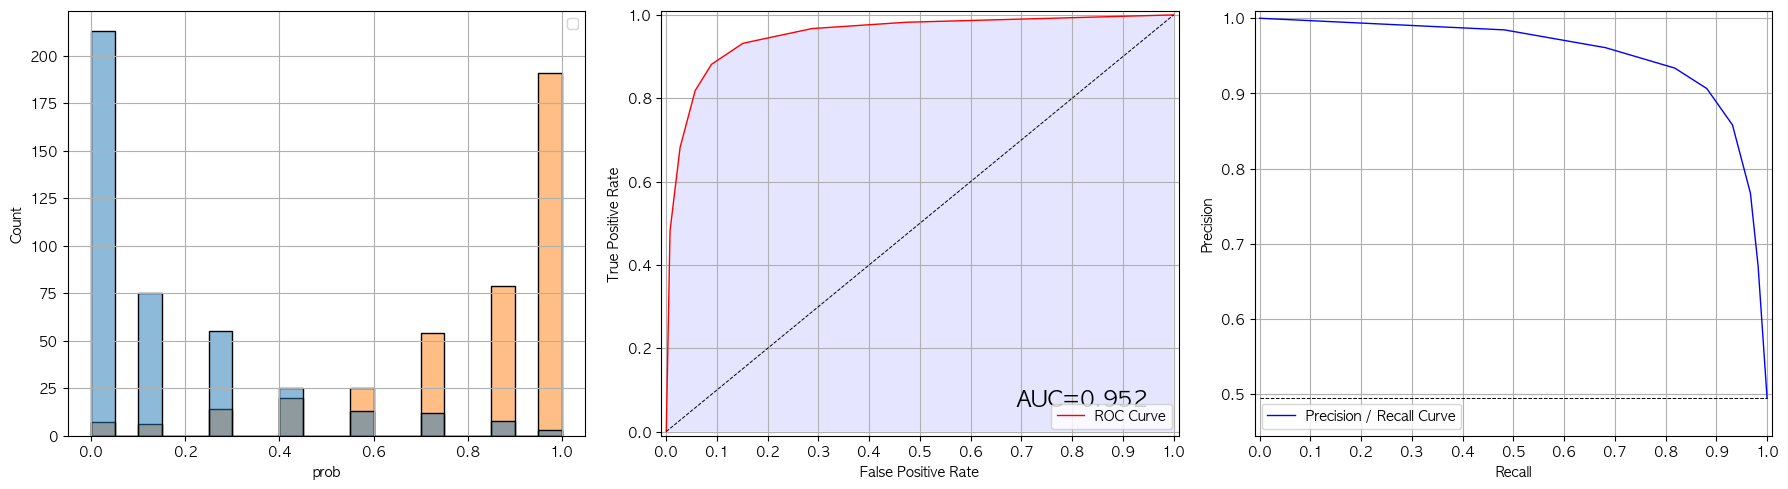


[학습곡선]


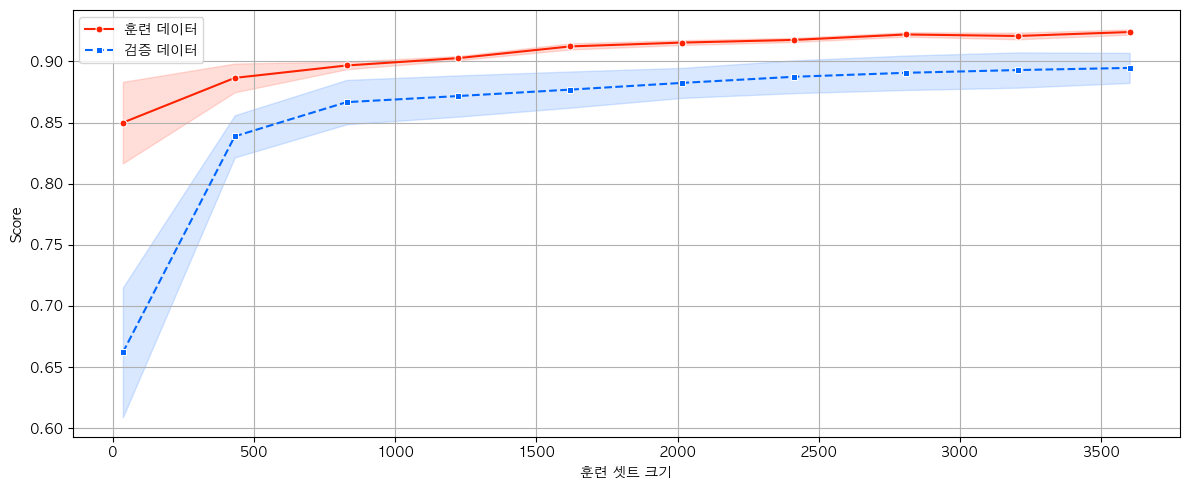

+----+------------+-----------------------+---------+
|    | 종속변수   | 독립변수              |     VIF |
|----+------------+-----------------------+---------|
|  0 | Quality    | Size                  | 1.87187 |
|  1 | Quality    | Weight                | 1.78771 |
|  2 | Quality    | Sweetness             | 2.02262 |
|  3 | Quality    | Crunchiness           | 1.54217 |
|  4 | Quality    | Juiciness             | 1.75179 |
|  5 | Quality    | Ripeness              |  1.8997 |
|  6 | Quality    | Acidity               |  1.5968 |
|  7 | Quality    | Size^2                | 4.28126 |
|  8 | Quality    | Size Weight           | 4.25255 |
|  9 | Quality    | Size Sweetness        |  4.3602 |
| 10 | Quality    | Size Crunchiness      | 2.59149 |
| 11 | Quality    | Size Juiciness        | 2.57241 |
| 12 | Quality    | Size Ripeness         | 3.58224 |
| 13 | Quality    | Size Acidity          | 2.27102 |
| 14 | Quality    | Weight^2              | 3.50762 |
| 15 | Quality    | Weight Sweetness

In [10]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='Quality')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

estimators = my_classification(x_train, y_train, x_test, y_test)
my_classification_result(estimators['best'], x_train, y_train, x_test, y_test)
my_classification_report(estimators['best'], x_train, y_train, x_test, y_test)

> 1차항 만으로 진행한 경우보다 오히려 성능이 감소했다.
>
> 3,4,5차 항에 대한 시도도 해 볼 수 있겠지만 실행시간이 너무 오래 걸려서 여기서 결과를 채택함